In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import requests
from config import weather_api_key
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [5]:
## PSEUDOCODE ##
# 1. Import our dependencies and initialize counters and an empty list that will hold the weather data.
# 2. Loop through the cities list.
# 3.Group the cities in sets of 50 to log the process as we find the weather data for each city.
#     - Two counters will be needed here: one to log the city count from 1 to 50, and another for the sets.
# 4. Build the city_url or endpoint for each city.
# 5. Log the URL and the record and set numbers.
# 6. Make an API request for each city.
# 7. Parse the JSON weather data for the following:
#     - City, country, and date
#     - Latitude and longitude
#     - Maximum temperature
#     - Humidity
#     - Cloudiness
#     - Wind speed
# 8. Add the data to a list in a dictionary format and then convert the list to a DataFrame.

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [7]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
 # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")   

Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | pomabamba
Processing Record 3 of Set 1 | north platte
Processing Record 4 of Set 1 | carnarvon
Processing Record 5 of Set 1 | lagoa
Processing Record 6 of Set 1 | aybak
City not found. Skipping...
Processing Record 7 of Set 1 | vilyuysk
Processing Record 8 of Set 1 | college
Processing Record 9 of Set 1 | locri
Processing Record 10 of Set 1 | chuy
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | sao filipe
Processing Record 13 of Set 1 | wamba
Processing Record 14 of Set 1 | tasiilaq
Processing Record 15 of Set 1 | thompson
Processing Record 16 of Set 1 | arraial do cabo
Processing Record 17 of Set 1 | saskylakh
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | yangambi
Processing Record 21 of Set 1 | quatre cocos
Processing Record 22 of Set 1 | soldotna
Processing Record 23 of Set 1 | corredor
Processing Record 24 of Set 1 | hermanus
Pro

Processing Record 38 of Set 4 | yar-sale
Processing Record 39 of Set 4 | adrar
Processing Record 40 of Set 4 | moses lake
Processing Record 41 of Set 4 | la ronge
Processing Record 42 of Set 4 | teluk nibung
Processing Record 43 of Set 4 | nisia floresta
Processing Record 44 of Set 4 | anzhero-sudzhensk
Processing Record 45 of Set 4 | ahipara
Processing Record 46 of Set 4 | katete
Processing Record 47 of Set 4 | hamilton
Processing Record 48 of Set 4 | amderma
City not found. Skipping...
Processing Record 49 of Set 4 | bredasdorp
Processing Record 50 of Set 4 | sur
Processing Record 1 of Set 5 | vaja
Processing Record 2 of Set 5 | gualeguay
Processing Record 3 of Set 5 | benjamin hill
Processing Record 4 of Set 5 | namibe
Processing Record 5 of Set 5 | faya
Processing Record 6 of Set 5 | roald
Processing Record 7 of Set 5 | aljezur
Processing Record 8 of Set 5 | casper
Processing Record 9 of Set 5 | visby
Processing Record 10 of Set 5 | oyotun
Processing Record 11 of Set 5 | elizabeth 

Processing Record 32 of Set 8 | ziguinchor
Processing Record 33 of Set 8 | prince rupert
Processing Record 34 of Set 8 | tutoia
Processing Record 35 of Set 8 | kungurtug
Processing Record 36 of Set 8 | mirnyy
Processing Record 37 of Set 8 | kortkeros
Processing Record 38 of Set 8 | krasnovishersk
Processing Record 39 of Set 8 | mizdah
Processing Record 40 of Set 8 | riyadh
Processing Record 41 of Set 8 | shingu
Processing Record 42 of Set 8 | lodwar
Processing Record 43 of Set 8 | margate
Processing Record 44 of Set 8 | kulhudhuffushi
Processing Record 45 of Set 8 | kholodnyy
Processing Record 46 of Set 8 | bucerias
Processing Record 47 of Set 8 | lephepe
City not found. Skipping...
Processing Record 48 of Set 8 | mount pleasant
Processing Record 49 of Set 8 | fort frances
Processing Record 50 of Set 8 | arcata
Processing Record 1 of Set 9 | scarborough
Processing Record 2 of Set 9 | kamenka
Processing Record 3 of Set 9 | altay
Processing Record 4 of Set 9 | meulaboh
Processing Record 

Processing Record 16 of Set 12 | kuytun
Processing Record 17 of Set 12 | vestmannaeyjar
Processing Record 18 of Set 12 | vanavara
Processing Record 19 of Set 12 | cochabamba
Processing Record 20 of Set 12 | batticaloa
Processing Record 21 of Set 12 | beatrice
Processing Record 22 of Set 12 | ambon
Processing Record 23 of Set 12 | milkovo
Processing Record 24 of Set 12 | vardo
Processing Record 25 of Set 12 | port macquarie
Processing Record 26 of Set 12 | zhanatas
City not found. Skipping...
Processing Record 27 of Set 12 | iquitos
Processing Record 28 of Set 12 | puerto madryn
Processing Record 29 of Set 12 | sorvag
City not found. Skipping...
Processing Record 30 of Set 12 | mana
Processing Record 31 of Set 12 | bilma
Processing Record 32 of Set 12 | evensk
Processing Record 33 of Set 12 | pangnirtung
Processing Record 34 of Set 12 | lavrentiya
Processing Record 35 of Set 12 | galesong
Processing Record 36 of Set 12 | aksha
Processing Record 37 of Set 12 | alihe
Processing Record 38 

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Kapaa,22.0752,-159.3190,84.18,69,75,5.01,US,2021-10-01 02:29:18
1,Pomabamba,-8.8333,-77.4667,52.16,77,99,0.85,PE,2021-10-01 02:31:22
2,North Platte,41.1239,-100.7654,62.49,69,90,4.00,US,2021-10-01 02:27:07
3,Carnarvon,-24.8667,113.6333,77.07,69,75,16.11,AU,2021-10-01 02:31:22
4,Lagoa,39.0500,-27.9833,69.93,86,24,3.87,PT,2021-10-01 02:31:22
5,Vilyuysk,63.7553,121.6247,38.35,41,75,5.77,RU,2021-10-01 02:31:23
6,College,64.8569,-147.8028,39.15,67,75,6.91,US,2021-10-01 02:31:23
7,Locri,38.2414,16.2623,73.24,78,38,4.99,IT,2021-10-01 02:31:23
8,Chuy,-33.6971,-53.4616,59.16,93,100,14.20,UY,2021-10-01 02:31:24
9,Vaini,-21.2000,-175.2000,75.36,88,75,9.22,TO,2021-10-01 02:31:24


In [9]:
# Reorder the columns
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Kapaa,US,2021-10-01 02:29:18,22.0752,-159.3190,84.18,69,75,5.01
1,Pomabamba,PE,2021-10-01 02:31:22,-8.8333,-77.4667,52.16,77,99,0.85
2,North Platte,US,2021-10-01 02:27:07,41.1239,-100.7654,62.49,69,90,4.00
3,Carnarvon,AU,2021-10-01 02:31:22,-24.8667,113.6333,77.07,69,75,16.11
4,Lagoa,PT,2021-10-01 02:31:22,39.0500,-27.9833,69.93,86,24,3.87
5,Vilyuysk,RU,2021-10-01 02:31:23,63.7553,121.6247,38.35,41,75,5.77
6,College,US,2021-10-01 02:31:23,64.8569,-147.8028,39.15,67,75,6.91
7,Locri,IT,2021-10-01 02:31:23,38.2414,16.2623,73.24,78,38,4.99
8,Chuy,UY,2021-10-01 02:31:24,-33.6971,-53.4616,59.16,93,100,14.20
9,Vaini,TO,2021-10-01 02:31:24,-21.2000,-175.2000,75.36,88,75,9.22


In [10]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [11]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

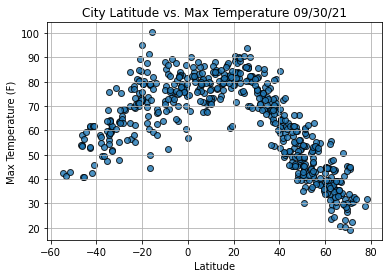

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

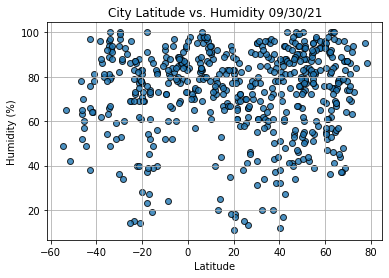

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

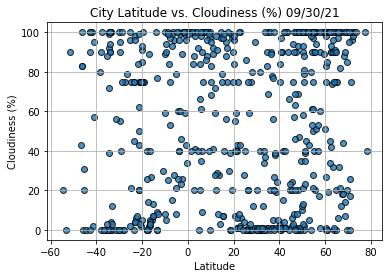

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

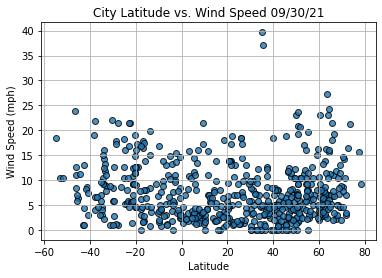

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

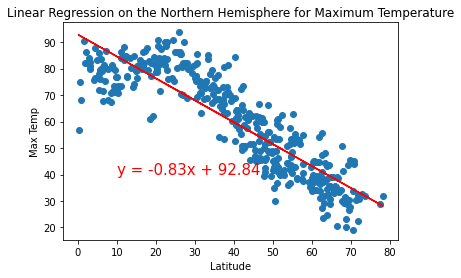

In [24]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

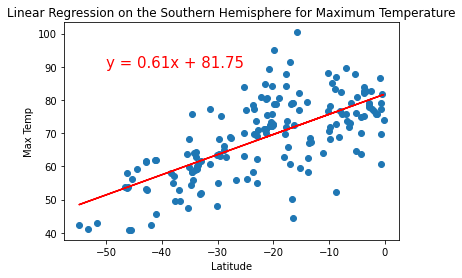

In [25]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

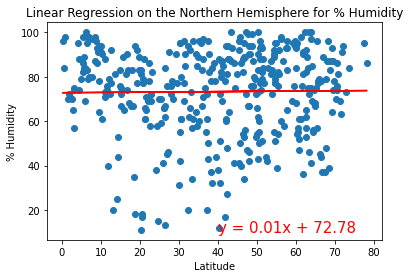

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(40,10))

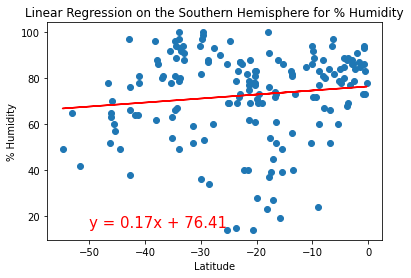

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

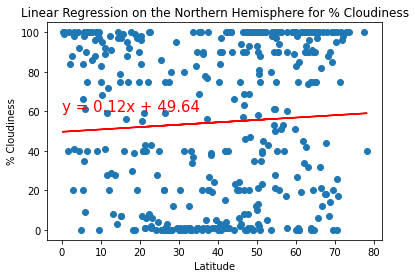

In [33]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(0,60))

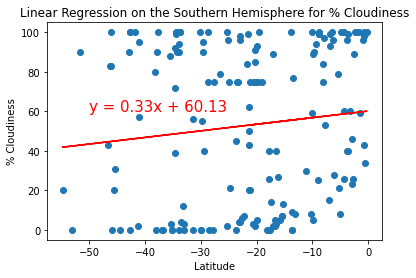

In [31]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-50,60))

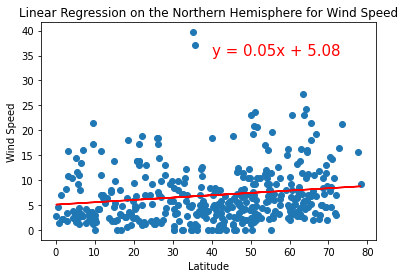

In [35]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(40,35))

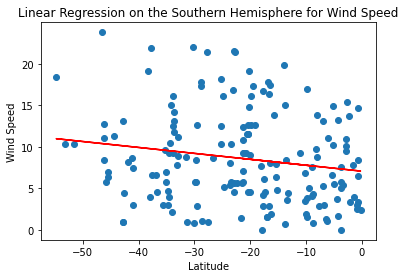

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-50,35))